In [13]:
df = pd.read_csv("index.csv")

In [14]:
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [15]:
X = df.drop(columns = ["Creditability"])
y = df['Creditability']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [19]:
train_x=sc.fit_transform(X_train)
test_x=sc.fit_transform(X_test)

In [20]:
X_train = train_x
X_test = test_x

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
X_train.shape

(670, 20)

In [44]:
input_dim = X_train.shape[1]
encoding_dim = 28

In [45]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="tanh")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [46]:
nb_epoch = 200
batch_size = 64

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 670 samples, validate on 330 samples
Epoch 1/200
670/670 [==============================] - 1s 982us/sample - loss: 1.0732 - accuracy: 0.0269 - val_loss: 1.0376 - val_accuracy: 0.0273
Epoch 2/200
670/670 [==============================] - 0s 63us/sample - loss: 1.0211 - accuracy: 0.0433 - val_loss: 0.9952 - val_accuracy: 0.0424
Epoch 3/200
670/670 [==============================] - 0s 68us/sample - loss: 0.9816 - accuracy: 0.0582 - val_loss: 0.9614 - val_accuracy: 0.0636
Epoch 4/200
670/670 [==============================] - 0s 62us/sample - loss: 0.9489 - accuracy: 0.0836 - val_loss: 0.9328 - val_accuracy: 0.0879
Epoch 5/200
670/670 [==============================] - 0s 62us/sample - loss: 0.9209 - accuracy: 0.1284 - val_loss: 0.9082 - val_accuracy: 0.1364
Epoch 6/200
670/670 [==============================] - 0s 63us/sample - loss: 0.8957 - accuracy: 0.1970 - val_loss: 0.8855 - val_accuracy: 0.1818
Epoch 7/200
670/670 [==============================] - 0s 61us/sample - loss:

670/670 [==============================] - 0s 116us/sample - loss: 0.5583 - accuracy: 0.6284 - val_loss: 0.5781 - val_accuracy: 0.5606
Epoch 57/200
670/670 [==============================] - 0s 112us/sample - loss: 0.5569 - accuracy: 0.6328 - val_loss: 0.5771 - val_accuracy: 0.5576
Epoch 58/200
670/670 [==============================] - 0s 120us/sample - loss: 0.5555 - accuracy: 0.6343 - val_loss: 0.5760 - val_accuracy: 0.5545
Epoch 59/200
670/670 [==============================] - 0s 115us/sample - loss: 0.5541 - accuracy: 0.6373 - val_loss: 0.5750 - val_accuracy: 0.5545
Epoch 60/200
670/670 [==============================] - 0s 117us/sample - loss: 0.5528 - accuracy: 0.6358 - val_loss: 0.5739 - val_accuracy: 0.5606
Epoch 61/200
670/670 [==============================] - 0s 115us/sample - loss: 0.5515 - accuracy: 0.6358 - val_loss: 0.5731 - val_accuracy: 0.5636
Epoch 62/200
670/670 [==============================] - 0s 113us/sample - loss: 0.5503 - accuracy: 0.6373 - val_loss: 0.5716 

670/670 [==============================] - 0s 119us/sample - loss: 0.5066 - accuracy: 0.6687 - val_loss: 0.5302 - val_accuracy: 0.6364
Epoch 112/200
670/670 [==============================] - 0s 113us/sample - loss: 0.5059 - accuracy: 0.6821 - val_loss: 0.5295 - val_accuracy: 0.6394
Epoch 113/200
670/670 [==============================] - 0s 117us/sample - loss: 0.5052 - accuracy: 0.6866 - val_loss: 0.5291 - val_accuracy: 0.6333
Epoch 114/200
670/670 [==============================] - 0s 120us/sample - loss: 0.5046 - accuracy: 0.6806 - val_loss: 0.5283 - val_accuracy: 0.6364
Epoch 115/200
670/670 [==============================] - 0s 128us/sample - loss: 0.5038 - accuracy: 0.6836 - val_loss: 0.5281 - val_accuracy: 0.6364
Epoch 116/200
670/670 [==============================] - 0s 130us/sample - loss: 0.5032 - accuracy: 0.6836 - val_loss: 0.5273 - val_accuracy: 0.6394
Epoch 117/200
670/670 [==============================] - 0s 122us/sample - loss: 0.5025 - accuracy: 0.6866 - val_loss: 0

670/670 [==============================] - 0s 114us/sample - loss: 0.4757 - accuracy: 0.7209 - val_loss: 0.4986 - val_accuracy: 0.6909
Epoch 167/200
670/670 [==============================] - 0s 68us/sample - loss: 0.4753 - accuracy: 0.7284 - val_loss: 0.4992 - val_accuracy: 0.6848
Epoch 168/200
670/670 [==============================] - 0s 114us/sample - loss: 0.4750 - accuracy: 0.7313 - val_loss: 0.4981 - val_accuracy: 0.6818
Epoch 169/200
670/670 [==============================] - 0s 77us/sample - loss: 0.4746 - accuracy: 0.7224 - val_loss: 0.4981 - val_accuracy: 0.6818
Epoch 170/200
670/670 [==============================] - 0s 123us/sample - loss: 0.4740 - accuracy: 0.7313 - val_loss: 0.4974 - val_accuracy: 0.6909
Epoch 171/200
670/670 [==============================] - 0s 124us/sample - loss: 0.4735 - accuracy: 0.7328 - val_loss: 0.4970 - val_accuracy: 0.6879
Epoch 172/200
670/670 [==============================] - 0s 118us/sample - loss: 0.4731 - accuracy: 0.7269 - val_loss: 0.4

In [47]:
predictions = autoencoder.predict(X_test)

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [50]:
threshold = 2.9

In [51]:
LABELS = ["Score", "NoScore"]

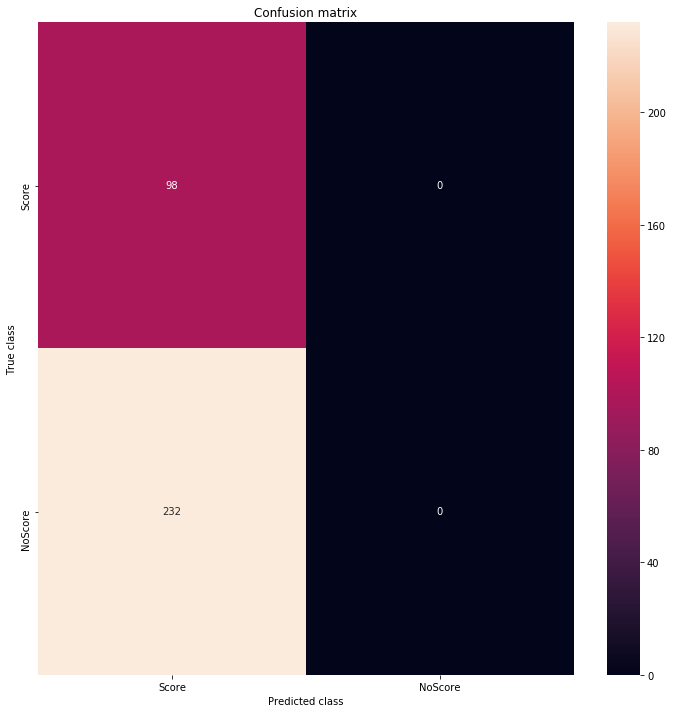

In [52]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
